In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

# Question 1

## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
df['created_at'] = pd.to_datetime(df['created_at'])

In [7]:
df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


The AOV was naively calculated from the datatset. It is the `mean` of the `order_amount` column; moreover, the standard deviation also seems to be very high. This indicates that there are outliers skewing the data to be higher than it actually is. The Boxplot of the naive data show that exact fact below.

<AxesSubplot:xlabel='order_amount'>

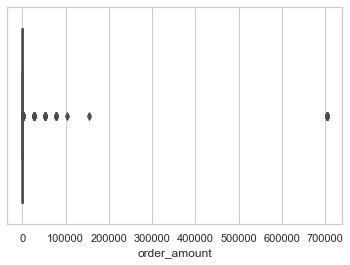

In [8]:
sns.boxplot(x=df['order_amount'])

Let's sort the data based on the order_amount to see how the outliers are behaving. They seem to be skewed to a higher price point on the number line. 

In [9]:
df.sort_values(by=['order_amount', 'created_at'], ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00


As we can see in the above table:
- one user bulk ordered shoes from the same store multiple times (via credit card)
- many of these bulk orders were carried out on the same day. 
- Simply removing these outliers with the Inter-Quantile-Range should suffice. 

In [11]:
removed_outliers = df['order_amount'].between(df['order_amount'].quantile(0.25), df['order_amount'].quantile(0.75))

<AxesSubplot:xlabel='order_amount'>

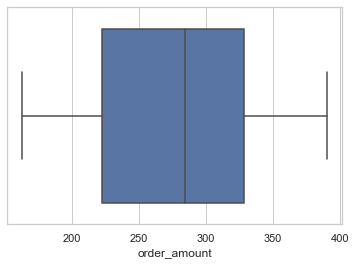

In [12]:
sns.boxplot(x=df[removed_outliers]['order_amount'])

Using the Inter Quantile Range (IQR) to filter the outliers provided for a much cleaner distribution.

In [15]:
df[removed_outliers][['order_amount', 'total_items']].describe()

,order_amount,total_items
count,2537.000000,2537.000000
mean,275.181317,1.838392
std,67.901112,0.534216
min,163.000000,1.000000
25%,222.000000,2.000000
50%,284.000000,2.000000
75%,328.000000,2.000000
max,390.000000,4.000000


The new AOV is $275.18. This value seems much more appropriate for relatively affordable shoes.

## b/c. What metric would you report for this dataset? / What is its value?

I would use the median (i.e. 50% quantile) of the data to get a better estimate of the average order value. Event with the outliers, it had a stable value of $284.00.